In [2]:
#setup
import tensorflow as tf

tf.enable_eager_execution()


In [3]:
'''
1. define the model
2. define a loss function
3. obtain training data
4. run through train data and ues an optimizer to adjust the variables to fit the data

'''


'\n1. define the model\n2. define a loss function\n3. obtain training data\n4. run through train data and ues an optimizer to adjust the variables to fit the data\n\n'

In [4]:
# 1. Define the model
class Model(object):
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    def __call__(self, x):
        return self.W*x + self.b

model = Model()
assert model(3.0).numpy() == 15.0

In [5]:
# 2. define a loss function 
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [6]:
# 3. obtain train data
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random_normal(shape=[NUM_EXAMPLES])
noise   = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

In [7]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: '),
print(loss(model(inputs), outputs).numpy())

<Figure size 640x480 with 1 Axes>

Current loss: 
9.245497


Epoch  0: W=5.00 b=0.00, loss=9.24550
Epoch  1: W=4.57 b=0.40, loss=6.17755
Epoch  2: W=4.24 b=0.72, loss=4.25365
Epoch  3: W=3.98 b=0.98, loss=3.04658
Epoch  4: W=3.78 b=1.19, loss=2.28887
Epoch  5: W=3.62 b=1.35, loss=1.81301
Epoch  6: W=3.49 b=1.49, loss=1.51401
Epoch  7: W=3.39 b=1.59, loss=1.32604
Epoch  8: W=3.31 b=1.68, loss=1.20782
Epoch  9: W=3.25 b=1.75, loss=1.13343


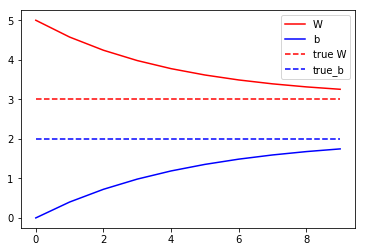

In [8]:
# 4. define a train loop
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()